## Mobile Price Classification

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict actual price but a price range indicating how high the price is


In [3]:
!Pip install pyforest

#### dataset

In [1]:
import os
os.chdir('E:\project_2022\mobile price classification\mobile price classification')

In [2]:
pd.set_option('display.Max_columns',None)

C:\Users\Sai\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<IPython.core.display.Javascript object>

In [3]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,no,2.2,no,1,no,7,0.6,188,2,2,20,756,2549,9,7,19,no,no,yes,1
1,1021,yes,0.5,yes,0,yes,53,0.7,136,3,6,905,1988,2631,17,3,7,yes,yes,no,2
2,563,yes,0.5,yes,2,yes,41,0.9,145,5,6,1263,1716,2603,11,2,9,yes,yes,no,2
3,615,yes,2.5,no,0,no,10,0.8,131,6,9,1216,1786,2769,16,8,11,yes,no,no,2
4,1821,yes,1.2,no,13,yes,44,0.6,141,2,14,1208,1212,1411,8,2,15,yes,yes,no,1


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [6]:
data_train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [7]:
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Their is no any null values present in the data

### Check correlation of the data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-8-4e630d8dd147>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_train.corr(),robust=True,annot=True)


<AxesSubplot:>

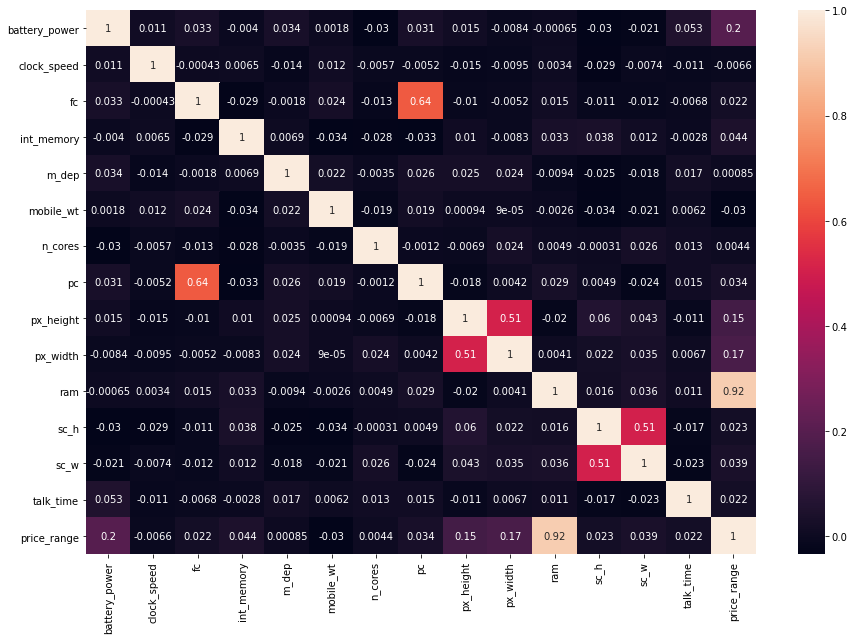

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(data_train.corr(),robust=True,annot=True)

 Here in the numerical features ram feature are highly correlated to prediction of price range.

<IPython.core.display.Javascript object>

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


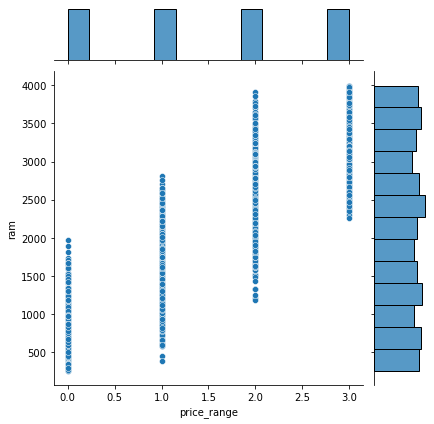

In [9]:
sns.jointplot(data_train['price_range'],data_train['ram'])

#### Clean the data

In [10]:
data1=pd.get_dummies(data_train[data_train.select_dtypes(include=['object']).columns],drop_first=True)
data1

<IPython.core.display.Javascript object>

,blue_yes,dual_sim_yes,four_g_yes,three_g_yes,touch_screen_yes,wifi_yes
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


In [11]:
data_train1=pd.concat([data_train,data1],axis=1)
data_train1.head()

<IPython.core.display.Javascript object>

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,blue_yes,dual_sim_yes,four_g_yes,three_g_yes,touch_screen_yes,wifi_yes
0,842,no,2.2,no,1,no,7,0.6,188,2,2,20,756,2549,9,7,19,no,no,yes,1,0,0,0,0,0,1
1,1021,yes,0.5,yes,0,yes,53,0.7,136,3,6,905,1988,2631,17,3,7,yes,yes,no,2,1,1,1,1,1,0
2,563,yes,0.5,yes,2,yes,41,0.9,145,5,6,1263,1716,2603,11,2,9,yes,yes,no,2,1,1,1,1,1,0
3,615,yes,2.5,no,0,no,10,0.8,131,6,9,1216,1786,2769,16,8,11,yes,no,no,2,1,0,0,1,0,0
4,1821,yes,1.2,no,13,yes,44,0.6,141,2,14,1208,1212,1411,8,2,15,yes,yes,no,1,1,0,1,1,1,0


In [12]:
data_train1.drop(columns=list(data_train1.select_dtypes(include=['object']).columns),inplace=True)

In [13]:
data_train1.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range,blue_yes,dual_sim_yes,four_g_yes,three_g_yes,touch_screen_yes,wifi_yes
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1,0,0,0,0,0,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2,1,1,1,1,1,0
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2,1,1,1,1,1,0
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2,1,0,0,1,0,0
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1,1,0


#### Feature selection

In [14]:
y=data_train1.loc[:,['price_range']]
x=data_train1.drop(['price_range'],axis=1)

In [15]:
from sklearn.feature_selection import VarianceThreshold
variation=VarianceThreshold(threshold=0.1)

In [16]:
variation.fit(x)

VarianceThreshold(threshold=0.1)

In [17]:
variation.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [18]:
p=x.columns[variation.get_support()]
p

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt',
       'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'blue_yes', 'dual_sim_yes', 'four_g_yes', 'three_g_yes',
       'touch_screen_yes', 'wifi_yes'],
      dtype='object')

In [19]:
not_imp_col=[i for i in x.columns if i not in p]
not_imp_col

['m_dep']

#### Mutual information gain

In [20]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y)


C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False).head(10).index

<IPython.core.display.Javascript object>

Index(['ram', 'px_height', 'px_width', 'battery_power', 'fc', 'pc', 'n_cores',
       'int_memory', 'mobile_wt', 'four_g_yes'],
      dtype='object')

<AxesSubplot:>

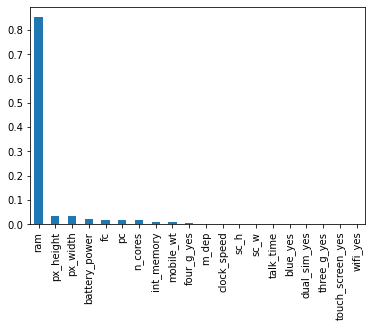

In [22]:
mutual_info.sort_values(ascending=False).plot.bar()

In [23]:
x1=mutual_info.sort_values(ascending=False).head(4).index
x11=data_train1[list(x1)]

Here we can select four feature that have the highest importance in the data

### SVC

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x11,y,random_state=0,test_size=0.2)

In [67]:
from sklearn.svm import SVC
m1=SVC(random_state=None,kernel='linear',verbose=True)

In [68]:
m1.fit(x_train,y_train)

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

SVC(kernel='linear', verbose=True)

In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,m1.predict(x_test)))

[[ 90   5   0   0]
 [  2  89   1   0]
 [  0   3  91   5]
 [  0   0   3 111]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,m1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        95
           1       0.92      0.97      0.94        92
           2       0.96      0.92      0.94        99
           3       0.96      0.97      0.97       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



#### Decision tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
m2=DecisionTreeClassifier(criterion='entropy')

In [72]:
m2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,m2.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        95
           1       0.83      0.89      0.86        92
           2       0.84      0.83      0.83        99
           3       0.94      0.91      0.92       114

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



#### Naive biase classifier

In [74]:
from sklearn.naive_bayes import GaussianNB
m3=GaussianNB()
m3.fit(x_train,y_train)

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,m3.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        95
           1       0.76      0.75      0.75        92
           2       0.71      0.68      0.69        99
           3       0.87      0.92      0.89       114

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



#### Random forest classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
m4=RandomForestClassifier(criterion='gini')
m4.fit(x_train,y_train)

<ipython-input-76-adfbdd4f7267>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m4.fit(x_train,y_train)


RandomForestClassifier()

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,m4.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        95
           1       0.90      0.90      0.90        92
           2       0.85      0.83      0.84        99
           3       0.91      0.93      0.92       114

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



#### KNN Classifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier
m5=KNeighborsClassifier(n_neighbors=7)
m5.fit(x_train,y_train)

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,m5.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       0.96      0.95      0.95        92
           2       0.94      0.91      0.92        99
           3       0.96      0.96      0.96       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [80]:
from sklearn.metrics import accuracy_score


In [81]:
z=[m1,m2,m3,m4,m5]
for i in z:
    i.fit(x_train,y_train)
    print(f'The accuracy score of the model {i} is:',accuracy_score(y_test,i.predict(x_test)))
    

[LibSVM]

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score of the model SVC(kernel='linear', verbose=True) is: 0.9525
The accuracy score of the model DecisionTreeClassifier(criterion='entropy') is: 0.885
The accuracy score of the model GaussianNB() is: 0.825


C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-81-c27eb84e4b9c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(x_train,y_train)


The accuracy score of the model RandomForestClassifier() is: 0.92
The accuracy score of the model KNeighborsClassifier(n_neighbors=7) is: 0.955


C:\Users\Sai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [84]:
pickle.dump(m1,open('model.pkl','wb'))

<IPython.core.display.Javascript object>